<a href="https://colab.research.google.com/github/SupratimSircar05/Covid-19/blob/master/Covid_19_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
!pip install geopandas -q -q -q
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes

     |████████████████████████████████| 931kB 4.9MB/s 
     |████████████████████████████████| 10.4MB 55.0MB/s 
     |████████████████████████████████| 14.7MB 211kB/s 


In [0]:
url = 'https://raw.githubusercontent.com/Jcharis/DataScienceTools/master/Data_analysis_of_Coronavirus_Outbreak_with_Python/data/coronavirus_data.csv'
df = pd.read_csv(url)

In [0]:
df.head()

,Index,Province/State\n,Country/Region\n,Lat\n,Long\n\n\n\n\n,Date\n\n\n\n\n,Confirmed\n,Deaths\n\n,Recovered\n\n\n\n\n
0,1,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,2,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,3,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,4,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,5,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [0]:
df.columns

Index(['Index', 'Province/State\n', 'Country/Region\n', 'Lat\n',
       'Long\n\n\n\n\n', 'Date\n\n\n\n\n', 'Confirmed\n', 'Deaths\n\n',
       'Recovered\n\n\n\n\n'],
      dtype='object')

In [0]:
df.columns = df.columns.str.replace(r'\n', '', regex = True)

In [0]:
df.columns

Index(['Index', 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [0]:
df.rename(columns = {'Province/State':'Province_State', 'Country/Region':'Country_Region'}, inplace = True)

In [0]:
df.columns

Index(['Index', 'Province_State', 'Country_Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [0]:
df.shape

(3885, 9)

In [0]:
df.dtypes

Index               int64
Province_State     object
Country_Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object

In [0]:
df.head(10)

,Index,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,1,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,2,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,3,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,4,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,5,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0
5,6,Guangdong,Mainland China,23.3417,113.4244,1/22/20,26,0,0
6,7,Guangxi,Mainland China,23.8298,108.7881,1/22/20,2,0,0
7,8,Guizhou,Mainland China,26.8154,106.8748,1/22/20,1,0,0
8,9,Hainan,Mainland China,19.1959,109.7453,1/22/20,4,0,0
9,10,Hebei,Mainland China,38.0428,114.5149,1/22/20,1,0,0


In [0]:
df = df[['Index', 'Province_State', 'Country_Region', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered']]

In [0]:
df.isna().sum()

Index                0
Province_State    1665
Country_Region       0
Lat                  0
Long                 0
Date                 0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [0]:
df.describe()

,Index,Lat,Long,Confirmed,Deaths,Recovered
count,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000,3885.000000
mean,1943.000000,32.252000,45.775760,396.487773,10.804118,78.544402
std,1121.647226,18.256877,84.338854,4017.397180,137.191519,846.918788
min,1.000000,-37.813600,-123.869500,0.000000,0.000000,0.000000
25%,972.000000,27.610400,8.227500,0.000000,0.000000,0.000000
50%,1943.000000,35.191700,78.000000,2.000000,0.000000,0.000000
75%,2914.000000,42.315400,113.614000,40.000000,0.000000,4.000000
max,3885.000000,64.000000,153.400000,65596.000000,2641.000000,23383.000000


In [0]:
df.head()

,Index,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,1,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,2,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,3,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,4,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,5,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


In [0]:
df.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum()

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,555,17,28
1/23/20,653,18,30
1/24/20,941,26,36
1/25/20,1434,42,39
1/26/20,2118,56,52
1/27/20,2927,82,61
1/28/20,5578,131,107
1/29/20,6166,133,126
1/30/20,8234,171,143


In [0]:
df.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].max()

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17,28
1/23/20,444,17,28
1/24/20,549,24,31
1/25/20,761,40,32
1/26/20,1058,52,42
1/27/20,1423,76,45
1/28/20,3554,125,80
1/29/20,3554,125,88
1/30/20,4903,162,90


In [0]:
df_per_day = df.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].max()

In [0]:
df_per_day.head()

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17,28
1/23/20,444,17,28
1/24/20,549,24,31
1/25/20,761,40,32
1/26/20,1058,52,42


In [0]:
df_per_day.describe()

,Confirmed,Deaths,Recovered
count,37.000000,37.000000,37.000000
mean,32616.756757,1082.513514,5338.540541
std,25664.132012,915.678972,6895.411802
min,444.000000,17.000000,28.000000
25%,5806.000000,204.000000,141.000000
50%,29631.000000,871.000000,1795.000000
75%,61682.000000,1921.000000,9128.000000
max,65596.000000,2641.000000,23383.000000


In [0]:
df_per_day['Confirmed'].max()

65596

In [0]:
df_per_day['Confirmed'].min()

444

In [0]:
df_per_day['Confirmed'].idxmax()

'2/27/20'

In [0]:
df_per_day['Confirmed'].idxmin()

'1/22/20'

In [0]:
df.groupby(['Country_Region'])['Confirmed', 'Deaths', 'Recovered'].max()

,Confirmed,Deaths,Recovered
Country_Region,,,
Afghanistan,1,0,0
Algeria,1,0,0
Australia,8,0,4
Austria,3,0,0
Bahrain,33,0,0
Belgium,1,0,1
Brazil,1,0,0
Cambodia,1,0,1
Canada,7,0,3


In [0]:
df.groupby(['Province_State', 'Country_Region'])['Confirmed', 'Deaths', 'Recovered'].max()

,,Confirmed,Deaths,Recovered
Province_State,Country_Region,,,
Anhui,Mainland China,989,6,792
Beijing,Mainland China,410,5,248
"Boston, MA",US,1,0,0
British Columbia,Canada,7,0,3
"Chicago, IL",US,2,0,2
Chongqing,Mainland China,576,6,401
Diamond Princess cruise ship,Others,705,4,10
From Diamond Princess,Australia,8,0,0
Fujian,Mainland China,296,1,228


In [0]:
df['Country_Region'].value_counts()

Mainland China          1147
US                       629
Australia                185
Canada                   111
Malaysia                  37
India                     37
Russia                    37
Kuwait                    37
Belgium                   37
Romania                   37
Taiwan                    37
Sweden                    37
Greece                    37
Italy                     37
Norway                    37
UK                        37
Afghanistan               37
Pakistan                  37
Switzerland               37
San Marino                37
Philippines               37
Algeria                   37
Vietnam                   37
Denmark                   37
Nepal                     37
Bahrain                   37
Georgia                   37
Germany                   37
Thailand                  37
Austria                   37
Singapore                 37
Macau                     37
Cambodia                  37
Sri Lanka                 37
Iran          

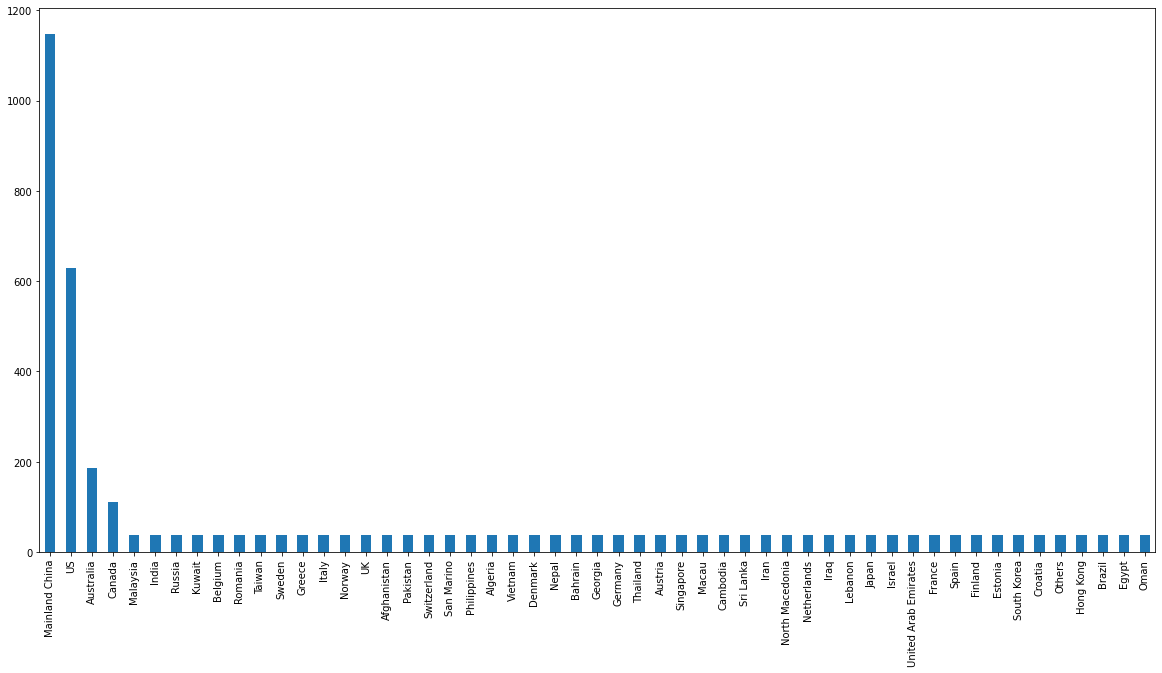

In [0]:
df['Country_Region'].value_counts().plot(kind = 'bar', figsize = (20, 10))

In [0]:
df['Country_Region'].unique()

array(['Mainland China', 'Thailand', 'Japan', 'South Korea', 'Taiwan',
       'US', 'Macau', 'Hong Kong', 'Singapore', 'Vietnam', 'France',
       'Nepal', 'Malaysia', 'Canada', 'Australia', 'Cambodia',
       'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates',
       'Philippines', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain',
       'Belgium', 'Others', 'Egypt', 'Iran', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Denmark', 'Estonia', 'Netherlands', 'San Marino'], dtype=object)

In [0]:
len(df['Country_Region'].unique())

53

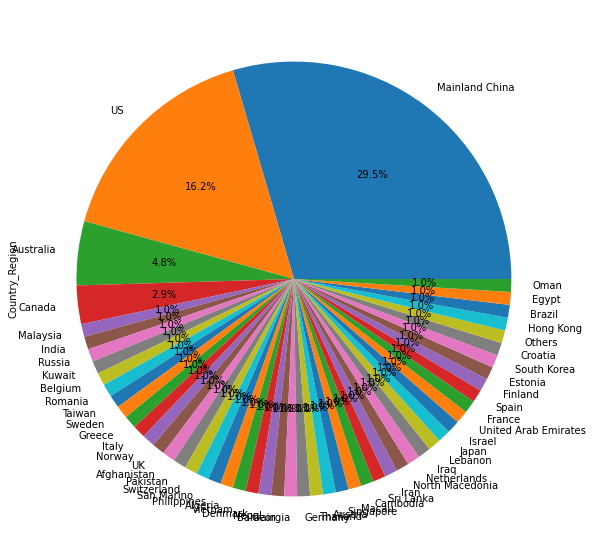

In [0]:
plt.figure(figsize = (20, 10))
df['Country_Region'].value_counts().plot.pie(autopct = "%1.1f%%")

In [0]:
dir(gpd)

['GeoDataFrame',
 'GeoSeries',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_config',
 '_version',
 'array',
 'base',
 'clip',
 'datasets',
 'geodataframe',
 'geopandas',
 'geoseries',
 'gpd',
 'io',
 'np',
 'options',
 'overlay',
 'pd',
 'plotting',
 'points_from_xy',
 'read_file',
 'read_postgis',
 'show_versions',
 'sjoin',
 'tools']

In [0]:
gdf01 = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df['Long'], df['Lat']))

In [0]:
gdf01.head()

,Index,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,1,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,2,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,3,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,4,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,5,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)


In [0]:
type(gdf01)

geopandas.geodataframe.GeoDataFrame

In [0]:
points = [Point(x, y) for x, y in zip(df.Long, df.Lat)]

In [0]:
gdf02 = gpd.GeoDataFrame(df, geometry = points)

In [0]:
gdf02.head()

,Index,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,1,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,2,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,3,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,4,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,5,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)


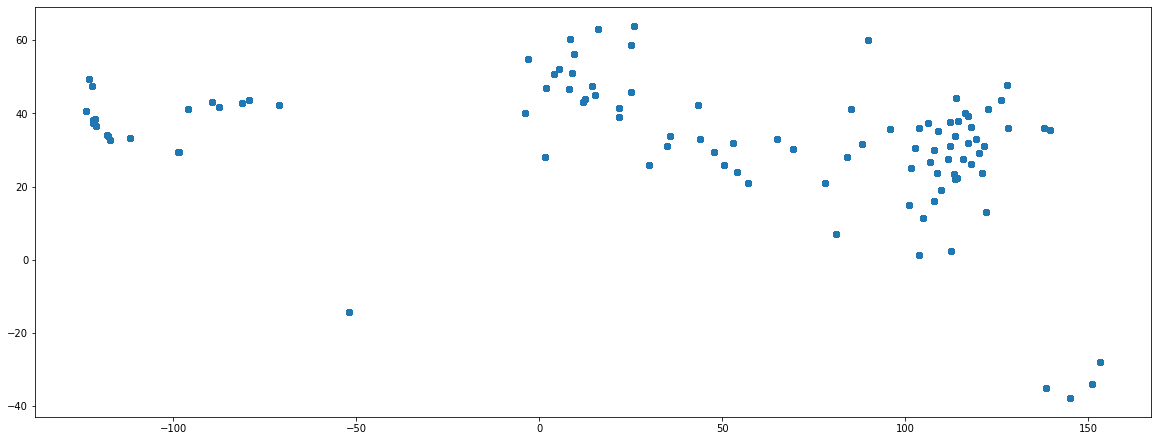

In [0]:
gdf01.plot(figsize = (20, 10))

(-198.0, 198.00000000000006, -98.6822565, 92.32738650000002)

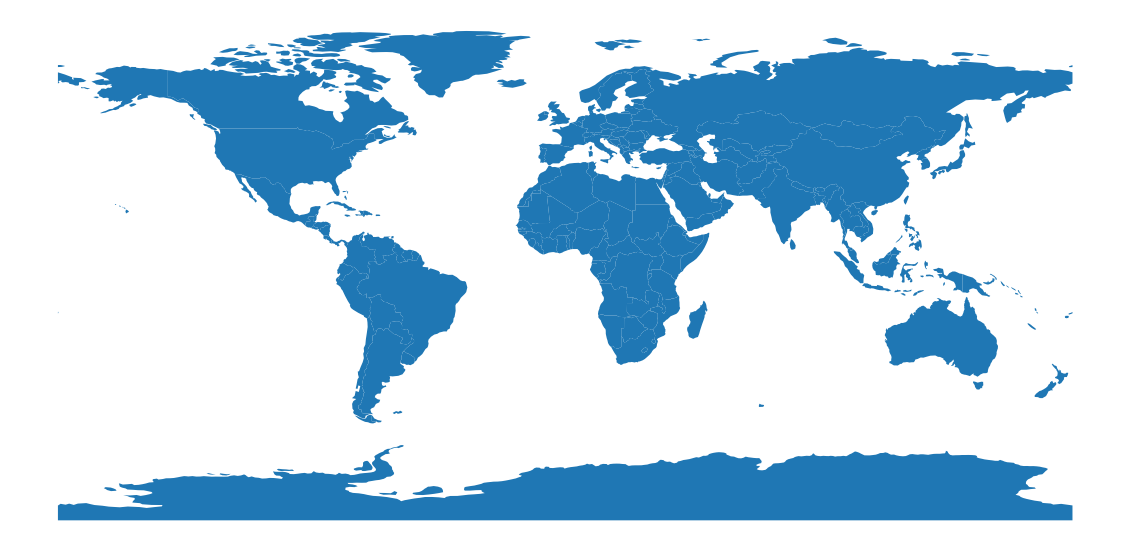

In [0]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize = (20, 10))
ax.axis('off')

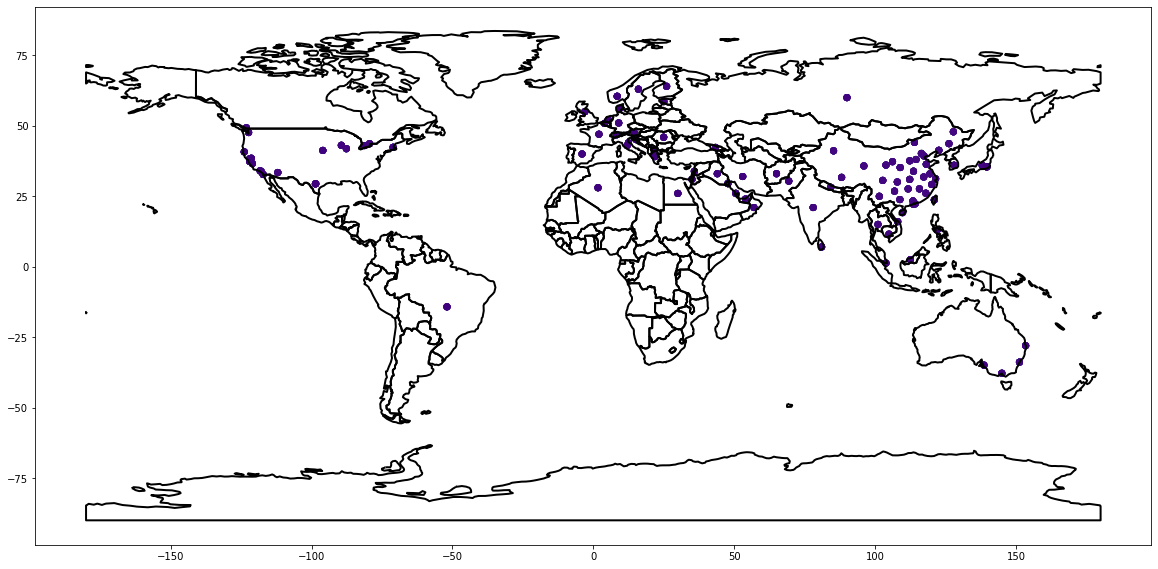

In [0]:
fig, ax = plt.subplots(figsize = (20, 10))
gdf01.plot(cmap = 'Purples', ax = ax)
world.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth = 2, ax = ax)

In [0]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [0]:
world['continent'].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [0]:
asia = world[world['continent'] == 'Asia']

In [0]:
africa = world[world['continent'] == 'Africa']

In [0]:
north_america = world[world['continent'] == 'North America']

In [0]:
europe = world[world['continent'] == 'Europe']

In [0]:
df.head()

,Index,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,1,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,2,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,3,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,4,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,5,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)


In [0]:
gdf01[gdf01['Country_Region'] == 'Mainland China']

,Index,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,1,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,2,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,3,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,4,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,5,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)
...,...,...,...,...,...,...,...,...,...,...
3806,3807,Tianjin,Mainland China,39.3054,117.3230,2/27/20,136,3,102,POINT (117.32300 39.30540)
3807,3808,Tibet,Mainland China,31.6927,88.0924,2/27/20,1,0,1,POINT (88.09240 31.69270)
3808,3809,Xinjiang,Mainland China,41.1129,85.2401,2/27/20,76,2,43,POINT (85.24010 41.11290)
3809,3810,Yunnan,Mainland China,24.9740,101.4870,2/27/20,174,2,150,POINT (101.48700 24.97400)


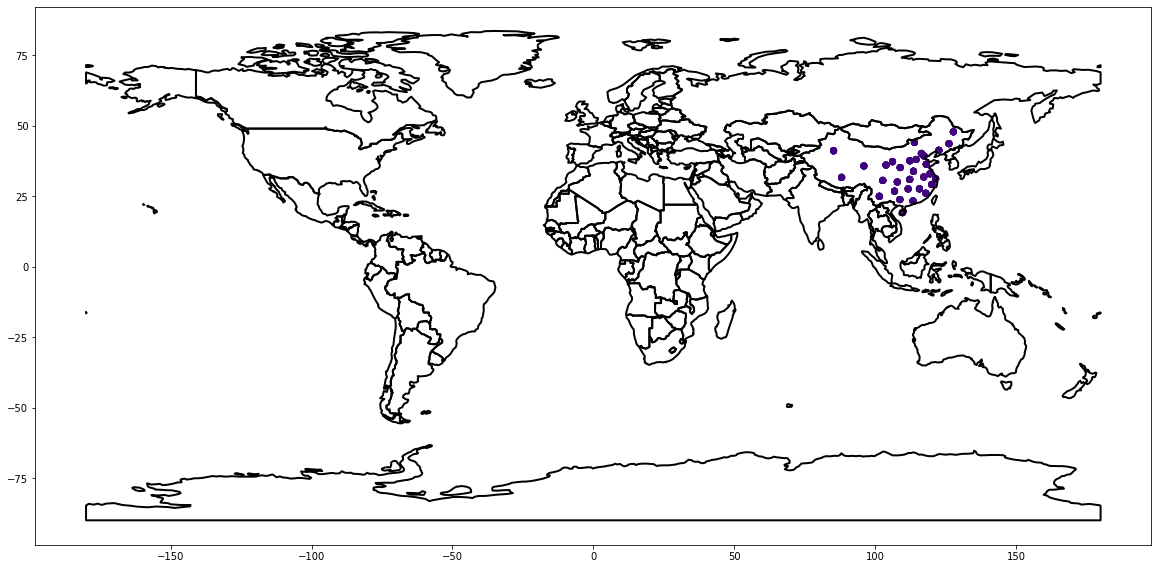

In [0]:
fig, ax = plt.subplots(figsize = (20, 10))
gdf01[gdf01['Country_Region'] == 'Mainland China'].plot(cmap = 'Purples', ax = ax)
world.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth = 2, ax = ax)

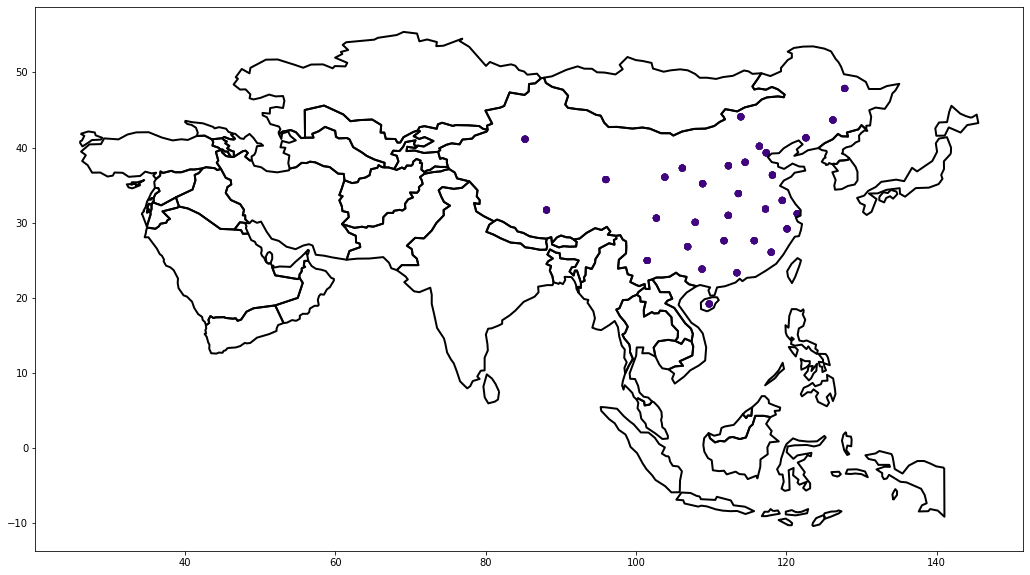

In [0]:
fig, ax = plt.subplots(figsize = (20, 10))
gdf01[gdf01['Country_Region'] == 'Mainland China'].plot(cmap = 'Purples', ax = ax)
asia.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth = 2, ax = ax)

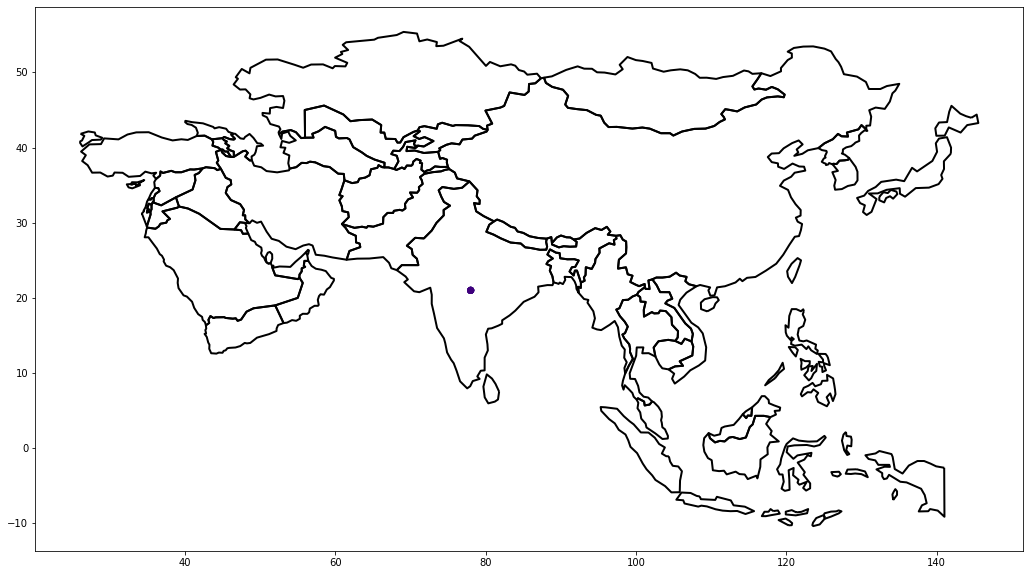

In [0]:
fig, ax = plt.subplots(figsize = (20, 10))
gdf01[gdf01['Country_Region'] == 'India'].plot(cmap = 'Purples', ax = ax)
asia.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth = 2, ax = ax)

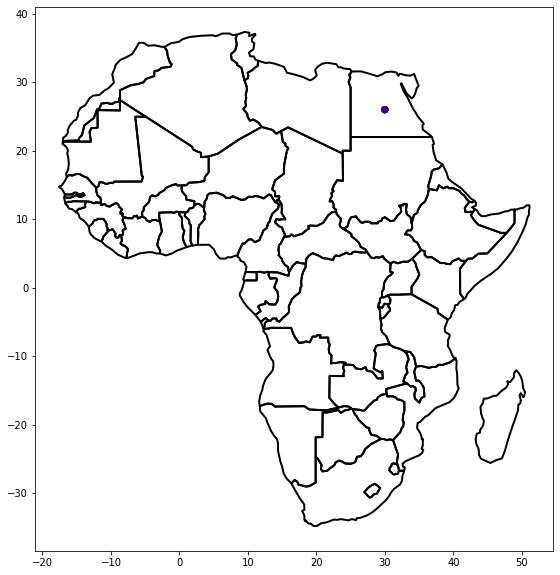

In [0]:
fig, ax = plt.subplots(figsize = (20, 10))
gdf01[gdf01['Country_Region'] == 'Egypt'].plot(cmap = 'Purples', ax = ax)
africa.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth = 2, ax = ax)

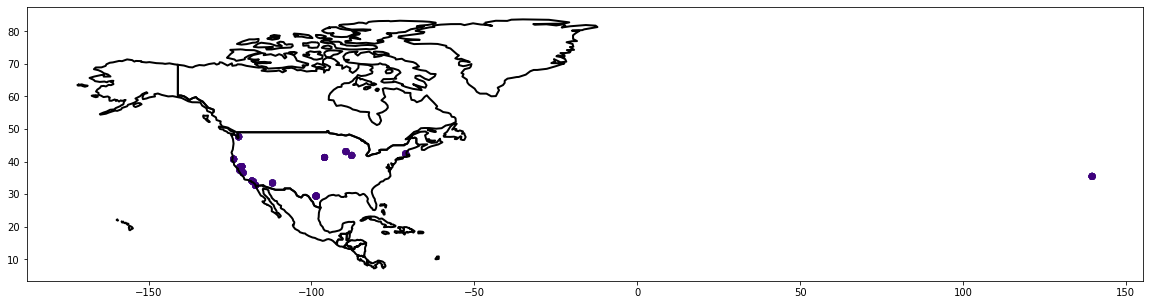

In [0]:
fig, ax = plt.subplots(figsize = (20, 10))
gdf01[gdf01['Country_Region'] == 'US'].plot(cmap = 'Purples', ax = ax)
north_america.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth = 2, ax = ax)

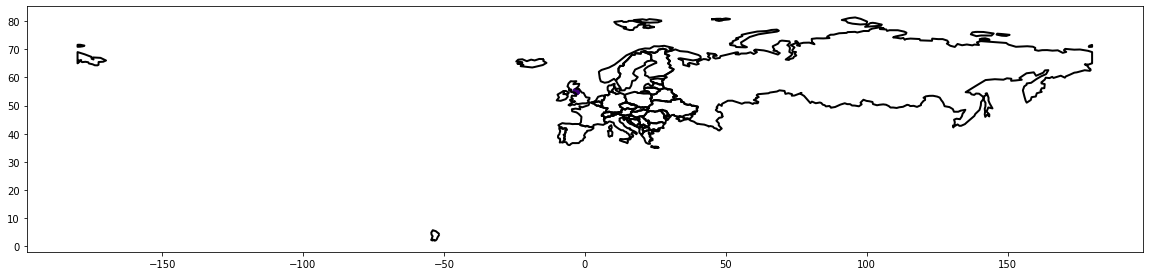

In [0]:
fig, ax = plt.subplots(figsize = (20, 10))
gdf01[gdf01['Country_Region'] == 'UK'].plot(cmap = 'Purples', ax = ax)
europe.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth = 2, ax = ax)

In [0]:
df.head()

,Index,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
0,1,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
1,2,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2,3,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
3,4,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
4,5,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)


In [0]:
df_per_day

,Confirmed,Deaths,Recovered
Date,,,
1/22/20,444,17,28
1/23/20,444,17,28
1/24/20,549,24,31
1/25/20,761,40,32
1/26/20,1058,52,42
1/27/20,1423,76,45
1/28/20,3554,125,80
1/29/20,3554,125,88
1/30/20,4903,162,90


In [0]:
df2 = df

In [0]:
df.to_csv("coronavirus_data_clean.csv")

In [0]:
import datetime as dt

In [0]:
df['cases_date'] = pd.to_datetime(df2['Date'])

In [0]:
df2.dtypes

Index                      int64
Province_State            object
Country_Region            object
Lat                      float64
Long                     float64
Date                      object
Confirmed                  int64
Deaths                     int64
Recovered                  int64
geometry                geometry
cases_date        datetime64[ns]
dtype: object

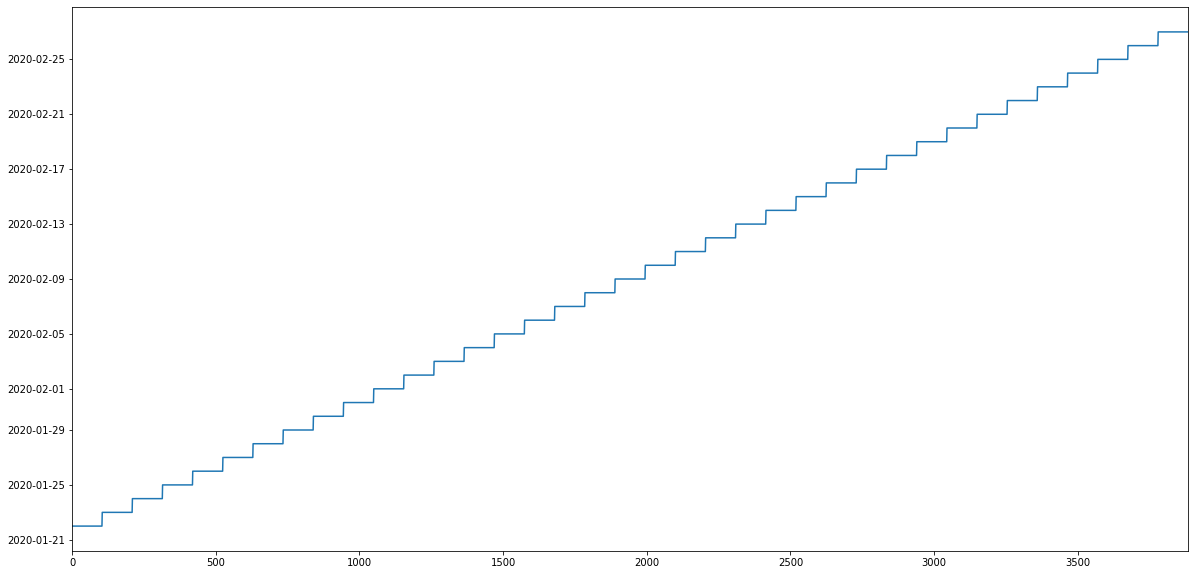

In [0]:
df['cases_date'].plot(figsize = (20, 10))

In [0]:
ts = df2.set_index('cases_date')

In [0]:
ts.head()

,Index,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
cases_date,,,,,,,,,,
2020-01-22,1,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
2020-01-22,2,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2020-01-22,3,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
2020-01-22,4,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
2020-01-22,5,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)


In [0]:
ts.loc['2020-01']

,Index,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
cases_date,,,,,,,,,,
2020-01-22,1,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0,POINT (117.22640 31.82570)
2020-01-22,2,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0,POINT (116.41420 40.18240)
2020-01-22,3,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0,POINT (107.87400 30.05720)
2020-01-22,4,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0,POINT (117.98740 26.07890)
2020-01-22,5,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0,POINT (103.83430 36.06110)
...,...,...,...,...,...,...,...,...,...,...
2020-01-31,1046,NaN,Romania,45.9432,24.9668,1/31/20,0,0,0,POINT (24.96680 45.94320)
2020-01-31,1047,NaN,Denmark,56.2639,9.5018,1/31/20,0,0,0,POINT (9.50180 56.26390)
2020-01-31,1048,NaN,Estonia,58.5953,25.0136,1/31/20,0,0,0,POINT (25.01360 58.59530)


In [0]:
ts.loc['2020-02-24' : '2020-02-25']

,Index,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,geometry
cases_date,,,,,,,,,,
2020-02-24,3466,Anhui,Mainland China,31.8257,117.2264,2/24/20,989,6,663,POINT (117.22640 31.82570)
2020-02-24,3467,Beijing,Mainland China,40.1824,116.4142,2/24/20,399,4,198,POINT (116.41420 40.18240)
2020-02-24,3468,Chongqing,Mainland China,30.0572,107.8740,2/24/20,576,6,349,POINT (107.87400 30.05720)
2020-02-24,3469,Fujian,Mainland China,26.0789,117.9874,2/24/20,293,1,183,POINT (117.98740 26.07890)
2020-02-24,3470,Gansu,Mainland China,36.0611,103.8343,2/24/20,91,2,80,POINT (103.83430 36.06110)
...,...,...,...,...,...,...,...,...,...,...
2020-02-25,3671,NaN,Romania,45.9432,24.9668,2/25/20,0,0,0,POINT (24.96680 45.94320)
2020-02-25,3672,NaN,Denmark,56.2639,9.5018,2/25/20,0,0,0,POINT (9.50180 56.26390)
2020-02-25,3673,NaN,Estonia,58.5953,25.0136,2/25/20,0,0,0,POINT (25.01360 58.59530)


In [0]:
ts.loc['2020-02-24' : '2020-02-25'][['Confirmed', 'Recovered']]

,Confirmed,Recovered
cases_date,,
2020-02-24,989,663
2020-02-24,399,198
2020-02-24,576,349
2020-02-24,293,183
2020-02-24,91,80
...,...,...
2020-02-25,0,0
2020-02-25,0,0
2020-02-25,0,0


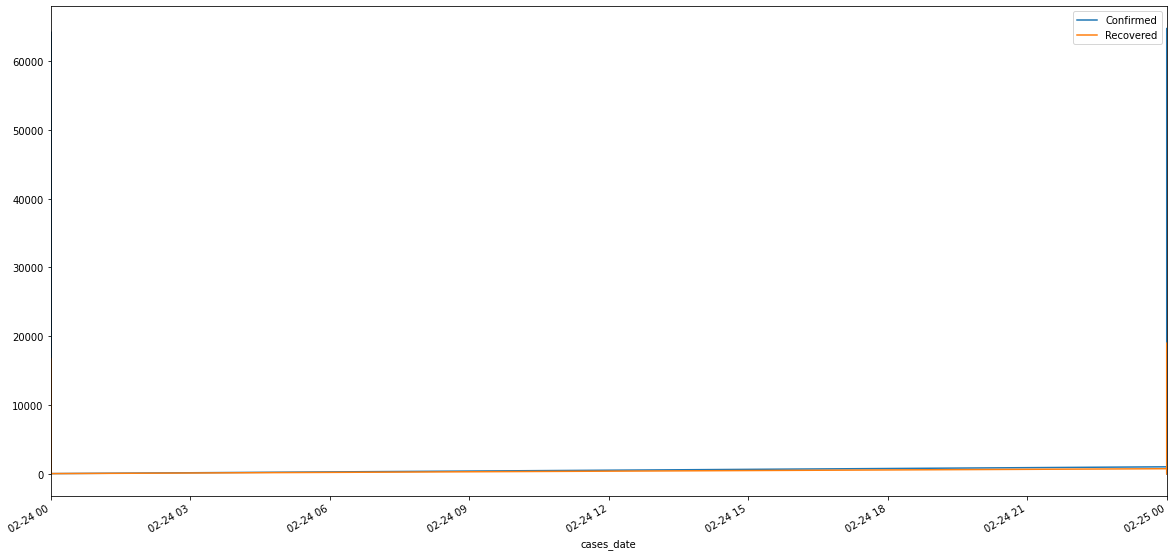

In [0]:
ts.loc['2020-02-24' : '2020-02-25'][['Confirmed', 'Recovered']].plot(figsize = (20, 10))

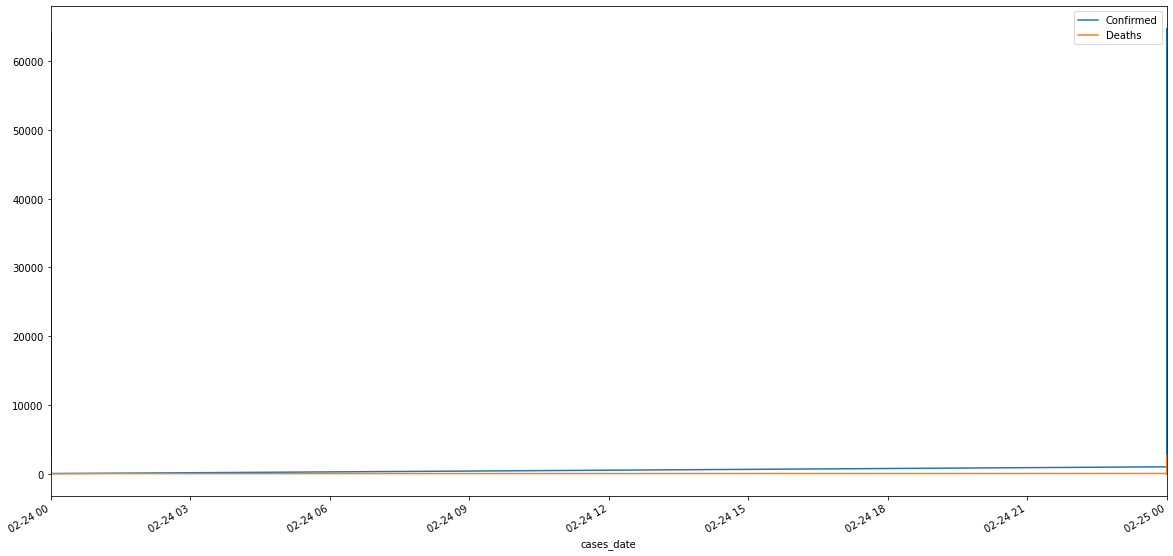

In [0]:
ts.loc['2020-02-24' : '2020-02-25'][['Confirmed', 'Deaths']].plot(figsize = (20, 10))

In [0]:
df_by_date = ts.groupby(['cases_date']).sum().reset_index(drop = None)

In [0]:
df_by_date

,cases_date,Index,Lat,Long,Confirmed,Deaths,Recovered
0,2020-01-22,5565,3386.46002,4806.4548,555,17,28
1,2020-01-23,16590,3386.46002,4806.4548,653,18,30
2,2020-01-24,27615,3386.46002,4806.4548,941,26,36
3,2020-01-25,38640,3386.46002,4806.4548,1434,42,39
4,2020-01-26,49665,3386.46002,4806.4548,2118,56,52
5,2020-01-27,60690,3386.46002,4806.4548,2927,82,61
6,2020-01-28,71715,3386.46002,4806.4548,5578,131,107
7,2020-01-29,82740,3386.46002,4806.4548,6166,133,126
8,2020-01-30,93765,3386.46002,4806.4548,8234,171,143
9,2020-01-31,104790,3386.46002,4806.4548,9927,213,222


In [0]:
df_by_date.columns

Index(['cases_date', 'Index', 'Lat', 'Long', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')

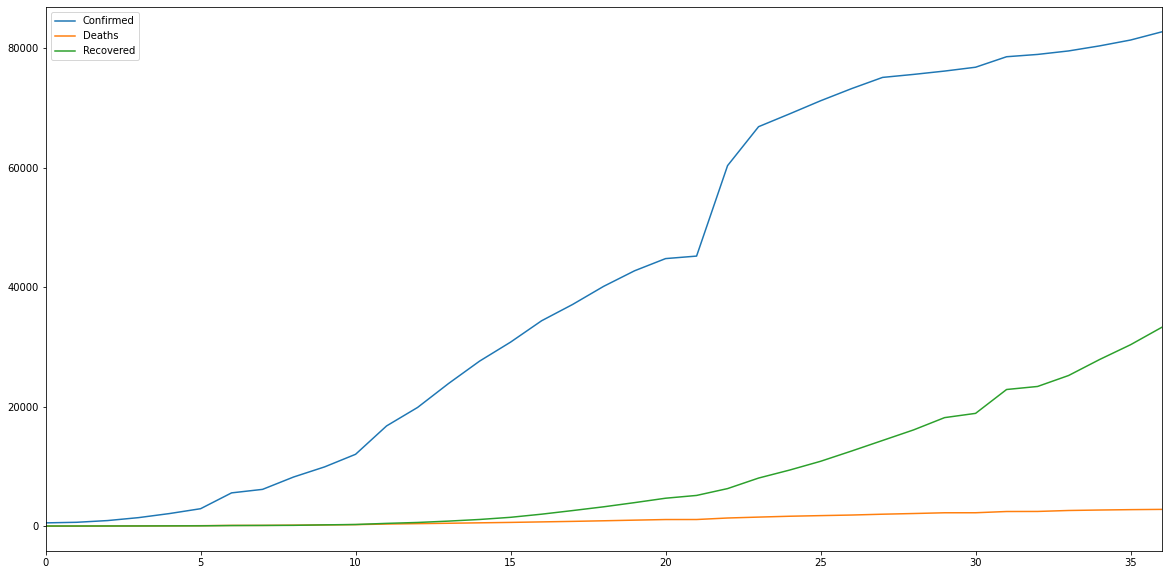

In [0]:
df_by_date[['Confirmed', 'Deaths', 'Recovered']].plot(kind = 'line', figsize = (20, 10))